# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
print("Beginning Data Retrieval    ")
print("----------------------------")
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

#variables
cityData = []
recordCount = 1
setCount = 1

for i, city in enumerate(cities):
    if(i % 50 == 0 and i >= 50):
        setCount += 1
        recordCount = 1
    
    cityURL = f"{url}&q={city}" #end url
    
    print(f"Processing city #{recordCount} in group #{setCount} | {city}")
    recordCount += 1
    
    try:
        cityWeather = requests.get(cityURL).json()
        time.sleep(2)
        
        cityLat = cityWeather["coord"]["lat"]
        cityLng = cityWeather["coord"]["lon"]
        cityMaxTemp = cityWeather["main"]["temp_max"]
        cityHumidity = cityWeather["main"]["humidity"]
        cityClouds = cityWeather["clouds"]["all"]
        cityWind = cityWeather["wind"]["speed"]
        cityCountry = cityWeather["sys"]["country"]
        cityDate = cityWeather["dt"]
        
        cityData.append({"City": city,
                        "Lat": cityLat,
                        "Lng": cityLng,
                        "Max Temp": cityMaxTemp,
                        "Humidity": cityHumidity,
                        "Cloudiness": cityClouds,
                        "Wind Speed": cityWind,
                        "Country": cityCountry,
                        "Date": cityDate})
    except: #handle errors
        print(f"{city} has an error. Skipping...")
        pass
    
print("--------------------------")
print("Data Retrieval Complete")
print("--------------------------")
    

Beginning Data Retrieval    
----------------------------
Processing city #1 in group #1 | ushuaia
Processing city #2 in group #1 | clyde river
Processing city #3 in group #1 | isabela
Processing city #4 in group #1 | illoqqortoormiut
illoqqortoormiut has an error. Skipping...
Processing city #5 in group #1 | hofn
Processing city #6 in group #1 | busselton
Processing city #7 in group #1 | mataura
Processing city #8 in group #1 | carnarvon
Processing city #9 in group #1 | huancavelica
Processing city #10 in group #1 | olafsvik
Processing city #11 in group #1 | santa cruz
Processing city #12 in group #1 | tasiilaq
Processing city #13 in group #1 | taolanaro
taolanaro has an error. Skipping...
Processing city #14 in group #1 | sur
Processing city #15 in group #1 | teya
Processing city #16 in group #1 | coolum beach
Processing city #17 in group #1 | hermanus
Processing city #18 in group #1 | rikitea
Processing city #19 in group #1 | atuona
Processing city #20 in group #1 | hobart
Processin

Processing city #26 in group #4 | ippy
Processing city #27 in group #4 | katsuura
Processing city #28 in group #4 | gander
Processing city #29 in group #4 | torbay
Processing city #30 in group #4 | yangjiang
Processing city #31 in group #4 | cartagena
Processing city #32 in group #4 | skibbereen
Processing city #33 in group #4 | tambura
Processing city #34 in group #4 | mayumba
Processing city #35 in group #4 | nuuk
Processing city #36 in group #4 | kachug
Processing city #37 in group #4 | korla
Processing city #38 in group #4 | arlit
Processing city #39 in group #4 | nizhneyansk
nizhneyansk has an error. Skipping...
Processing city #40 in group #4 | nanortalik
Processing city #41 in group #4 | bathsheba
Processing city #42 in group #4 | harnosand
Processing city #43 in group #4 | maryborough
Processing city #44 in group #4 | bubaque
Processing city #45 in group #4 | nemuro
Processing city #46 in group #4 | pangai
Processing city #47 in group #4 | grand river south east
grand river sou

Processing city #2 in group #8 | purpe
Processing city #3 in group #8 | dryden
Processing city #4 in group #8 | souillac
Processing city #5 in group #8 | staraya kulatka
Processing city #6 in group #8 | vaitupu
vaitupu has an error. Skipping...
Processing city #7 in group #8 | lakeway
Processing city #8 in group #8 | tongren
Processing city #9 in group #8 | hashima
Processing city #10 in group #8 | jatai
Processing city #11 in group #8 | gimbi
Processing city #12 in group #8 | airai
Processing city #13 in group #8 | te anau
Processing city #14 in group #8 | saint-michel-des-saints
Processing city #15 in group #8 | blagoyevo
Processing city #16 in group #8 | leh
Processing city #17 in group #8 | ust-kamchatsk
ust-kamchatsk has an error. Skipping...
Processing city #18 in group #8 | plouzane
Processing city #19 in group #8 | romos
Processing city #20 in group #8 | mankono
Processing city #21 in group #8 | wichita
Processing city #22 in group #8 | koungou
Processing city #23 in group #8 |

Processing city #29 in group #11 | hastings
Processing city #30 in group #11 | carlagan
Processing city #31 in group #11 | nabire
Processing city #32 in group #11 | qianan
Processing city #33 in group #11 | minas
Processing city #34 in group #11 | whitefish
Processing city #35 in group #11 | itoman
Processing city #36 in group #11 | ust-ishim
Processing city #37 in group #11 | san juan bautista
Processing city #38 in group #11 | grand gaube
Processing city #39 in group #11 | tara
Processing city #40 in group #11 | villamontes
Processing city #41 in group #11 | norwich
Processing city #42 in group #11 | dongning
Processing city #43 in group #11 | formosa
Processing city #44 in group #11 | kahului
Processing city #45 in group #11 | bosaso
Processing city #46 in group #11 | campoverde
Processing city #47 in group #11 | qingdao
Processing city #48 in group #11 | lubao
Processing city #49 in group #11 | kibungo
Processing city #50 in group #11 | kota tinggi
Processing city #1 in group #12 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cityDataPD = pd.DataFrame(cityData)
cityDataPD.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,55.02,50,20,20.71,AR,1667929187
1,clyde river,70.4692,-68.5914,12.43,85,100,12.66,CA,1667929387
2,isabela,6.7085,121.9711,78.91,85,100,1.83,PH,1667929347
3,hofn,64.2539,-15.2082,41.54,88,100,25.75,IS,1667929394
4,busselton,-33.6500,115.3333,59.40,78,86,3.65,AU,1667929397


In [14]:
cityDataPD.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02
mean,21.717280,27.227866,57.217214,72.527675,62.009225,7.673911,1.667930e+09
std,32.921236,90.607384,24.447267,21.246858,37.612504,5.465831,4.228783e+02
min,-54.800000,-175.200000,-24.740000,11.000000,0.000000,0.000000,1.667929e+09
25%,-3.426500,-52.274625,41.585000,62.000000,22.000000,3.515000,1.667930e+09
50%,27.295800,30.519100,61.565000,78.000000,75.000000,6.600000,1.667930e+09
75%,50.029125,106.989675,77.132500,89.000000,99.000000,10.352500,1.667930e+09
max,78.218600,179.316700,100.360000,100.000000,100.000000,32.550000,1.667931e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
humidCity = cityDataPD[(cityDataPD["Humidity"] > 100)].index
print(humidCity)

Int64Index([], dtype='int64')


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cityDataPD.drop(humidCity, inplace = False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,55.02,50,20,20.71,AR,1667929187
1,clyde river,70.4692,-68.5914,12.43,85,100,12.66,CA,1667929387
2,isabela,6.7085,121.9711,78.91,85,100,1.83,PH,1667929347
3,hofn,64.2539,-15.2082,41.54,88,100,25.75,IS,1667929394
4,busselton,-33.6500,115.3333,59.40,78,86,3.65,AU,1667929397


In [13]:
#Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
maxTemps = clean_city_data["Lng"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
windSpeed = clean_city_data["Wind Speed"]

clean_city_data.to_csv(output_data_file, index_label = "City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

[]

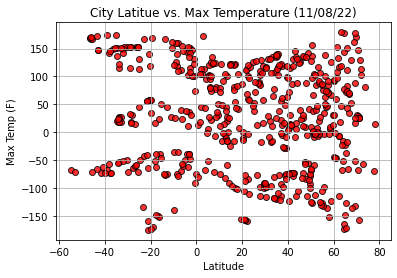

In [27]:
plt.scatter(lats, maxTemps, edgecolor = "black", color = "Red", marker = "o", alpha = 0.8, label = "Cities")
plt.title("City Latitue vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/Fig1.png")
plt.plot()

## Latitude vs. Humidity Plot

[]

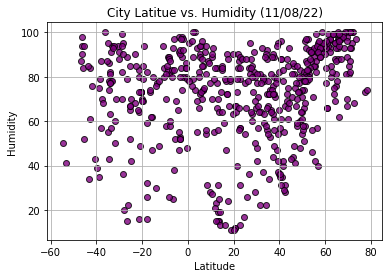

In [28]:
plt.scatter(lats, humidity, edgecolor = "black", color = "Purple", marker = "o", alpha = 0.8, label = "Cities")
plt.title("City Latitue vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/Fig2.png")
plt.plot()

## Latitude vs. Cloudiness Plot

[]

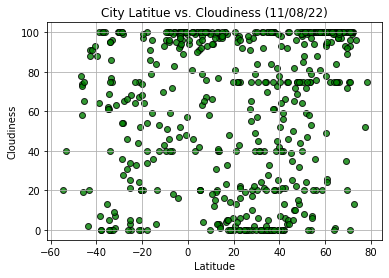

In [29]:
plt.scatter(lats, cloudiness, edgecolor = "black", color = "Green", marker = "o", alpha = 0.8, label = "Cities")
plt.title("City Latitue vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/Fig3.png")
plt.plot()

## Latitude vs. Wind Speed Plot

[]

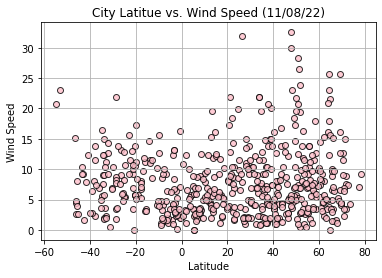

In [30]:
plt.scatter(lats, windSpeed, edgecolor = "black", color = "Pink", marker = "o", alpha = 0.8, label = "Cities")
plt.title("City Latitue vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/Fig4.png")
plt.plot()

## Linear Regression

In [37]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,"r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color = "red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [38]:
northHemi = cityDataPD.loc[(cityDataPD["Lat"] >= 0)]
southHemi = cityDataPD.loc[(cityDataPD["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7465539807337904


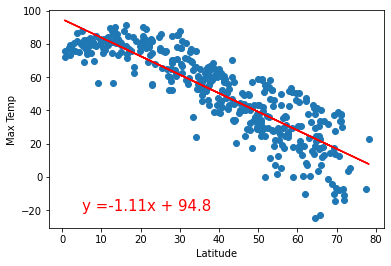

In [57]:
x_values = northHemi["Lat"]
y_values = northHemi["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (5,-20))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.36994083015790563


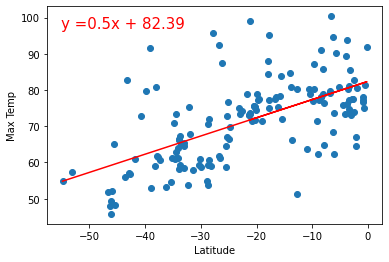

In [60]:
x_values = southHemi["Lat"]
y_values = southHemi["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55,97))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.11462226412557264


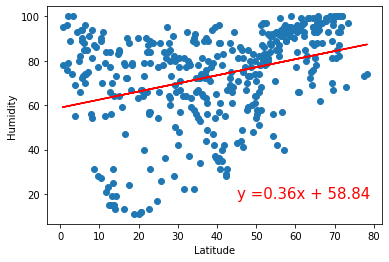

In [63]:
x_values = northHemi["Lat"]
y_values = northHemi["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (45,18))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.002361034201858119


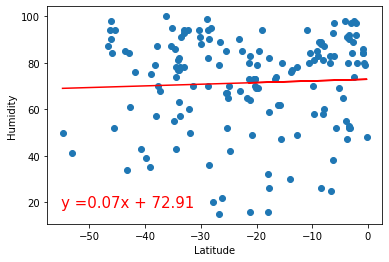

In [66]:
x_values = southHemi["Lat"]
y_values = southHemi["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-55,18))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05183775821081289


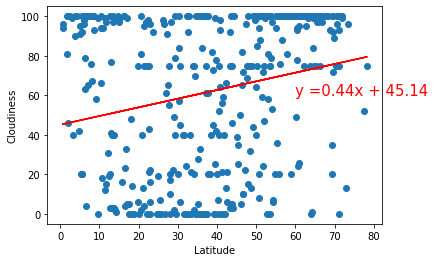

In [67]:
x_values = northHemi["Lat"]
y_values = northHemi["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (60,60))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.09316853696500042


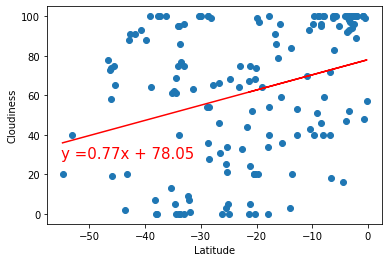

In [70]:
x_values = southHemi["Lat"]
y_values = southHemi["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-55,28))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.018766293134810246


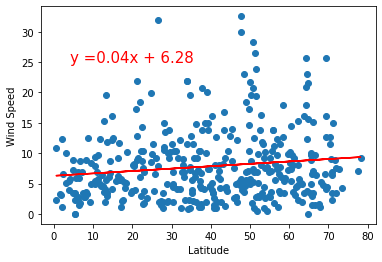

In [71]:
x_values = northHemi["Lat"]
y_values = northHemi["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (4,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.06767036801798958


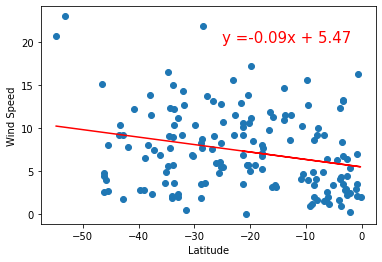

In [73]:
x_values = southHemi["Lat"]
y_values = southHemi["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-25,20))